In [4]:
from PIL import Image

img=Image.open('Cat.jpg')
img.show()

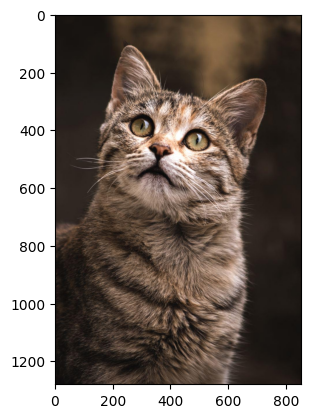

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image=img.imread('Cat.jpg')

plt.imshow(image[:,:,:])
plt.show()

In [ ]:
import numpy as np
img = np.array([[[1],[2]],[[3],[4]]]) #3-D
print(img.shape)

(2, 2, 1)


In [ ]:
import numpy as np
a = np.array([[[[2,3]],[[4,5]]],[[[4,5]],[[7,8]]]]) # 4-D
print(a.shape)

(2, 2, 1, 2)


In [ ]:
#Transformations on domain and range 
#change the position work on domain
#change the color work on range
#-------------------
#image resizing using openCV: INTER_AREA , #INTER_CUBIC , INTER_LINEAR


In [4]:
import cv2

img = cv2.imread('messi5.jpg')
half = cv2.resize(img, (0, 0), fx = 0.4, fy = 0.4)
bigger = cv2.resize(img, (1024, 1024))

print(img.shape)
print(half.shape)
print(bigger.shape)

cv2.imshow("Image1",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("Image2",half)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imshow("Image3",bigger)
cv2.waitKey(0)
cv2.destroyAllWindows()

(280, 450, 3)
(112, 180, 3)
(1024, 1024, 3)


In [ ]:
import cv2
import numpy as np
url = "http://192.168.0.101:8080/video"
cp = cv2.VideoCapture(url)
while(True):
    camera, frame = cp.read()
    if frame is not None:
        cv2.imshow("Frame", frame)
    q = cv2.waitKey(1)
    if q==ord("q"):
        break
cv2.destroyAllWindows()

In [ ]:
#sin(A+B) = sin(A)cos(B) + cos(A)sin(B)
#cos(A+B) = cos(A)cos(B) - sin(A)sin(B)
#sin(A-B) = sin(A)cos(B) - cos(A)sin(B)
#cos(A-B) = cos(A)cos(B) + sin(A)sin(B)

#(x1,y1) = (rcos(theta), rsin(theta))
#(x2,y2) = (rcos(theta+phi), rsin(theta+phi))
#here hyp is represented as r
#sintheta = op/hyp
#costheta = ad/hyp

#[x2  [costheta  -sintheta [x1
#    =
# y2] sintheta  costheta]  y1]

In [ ]:
#Image Rotation:
import cv2

img = cv2.imread('messi5.jpg')


# dividing height and width by 2 to get the center of the image
height, width = img.shape[:2]
# get the center coordinates of the image to create the 2D rotation matrix
center = (width / 2, height / 2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=80, scale=0.5) #####change angle 45,80....

print(rotate_matrix)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=img, M=rotate_matrix, dsize=(width, height))

cv2.imshow("Image",img)

print("Image Rotation")

cv2.imshow("RImage",rotated_image)
cv2.waitKey(0)

[[ 8.68240888e-02  4.92403877e-01  1.36528037e+02]
 [-4.92403877e-01  8.68240888e-02  2.38635500e+02]]
Image Rotation


13

: 

In [1]:
import cv2
import numpy as np

image = cv2.imread('Cat.jpg')
rows, cols = image.shape[:2]

# Shear matrix (x-shear)
shear_matrix = np.float32([[1, 0.5, 0],
                           [0,   1, 0]])

# Apply affine transform
sheared_image = cv2.warpAffine(image, shear_matrix, (int(cols * 1.5), rows))

h_flip = cv2.flip(image, 1) 
v_flip = cv2.flip(image, 0) 
both_flip = cv2.flip(image, -1) 

cv2.imshow("Original", image)
cv2.waitKey(0)
cv2.imshow("Sheared (Skewed)", sheared_image)

cv2.waitKey(0)
cv2.imshow("HFlip", h_flip)
cv2.waitKey(0)
cv2.imshow("VFlip", v_flip)
cv2.waitKey(0)
cv2.imshow("HVFlip", both_flip)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import cv2

img = cv2.imread('Cat.jpg', 0)  # Load in grayscale
cv2.imshow('Grayscale Cat', img)  # Window title and image
cv2.waitKey(0)  # Wait for a key press
cv2.destroyAllWindows()  # Close all OpenCV windows


In [ ]:
#Increase Brightness without using OpenCV:
import cv2
import numpy as np

# Read grayscale image
img = cv2.imread('Cat.jpg', 0)

# Add 20 to each pixel but cap at 255
img1 = np.clip(img + 20, 0, 255).astype(np.uint8)

# Show original and modified images
cv2.imshow("Original", img)
cv2.imshow("Increased Brightness", img1)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import cv2
import numpy as np

# Load grayscale image
img = cv2.imread('Cat.jpg', 0)

# Create a new image to store the result
bright_img = np.zeros(img.shape, dtype=np.uint8)

# Get image dimensions
rows, cols = img.shape

# Increase brightness by 20 using 2 for loops
for i in range(rows):
    for j in range(cols):
        new_value = img[i, j] + 20
        if new_value > 255:
            new_value = 255
        bright_img[i, j] = new_value

# Show the result
cv2.imshow('Brightened Image', bright_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\EELAPANTI MYTHRI\AppData\Local\Temp\ipykernel_4068\2234645671.py:16: RuntimeWarning: overflow encountered in scalar add
  new_value = img[i, j] + 20


In [10]:
#COntrast of an Image:*


import cv2
import numpy as np

def contrast_stretch(img):
    a, b = 20, 230  # new range
    rmin, rmax = np.min(img), np.max(img)
    stretched = (img - rmin) * ((b - a) / (rmax - rmin)) + a
    return np.uint8(stretched)

img = cv2.imread('Cat.jpg', 0)
cv2.imshow("Original", img)
cv2.waitKey(0)
stretched_img = contrast_stretch(img)

cv2.imshow("Contrast Stretched", stretched_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
#Binary Representation:

import cv2

img = cv2.imread('Cat.jpg', 0)

_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

cv2.imshow("Thresholded", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
#Binary Representation:

import cv2

img = cv2.imread('my.png', 0)

_, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

cv2.imshow("Thresholded", thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
import cv2

# Read the image from file
image = cv2.imread('Cat.jpg')

# Convert the image from BGR to HSV color space
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_img

array([[[ 11,  78,  26],
        [ 11,  78,  26],
        [ 11,  78,  26],
        ...,
        [ 15, 111,  71],
        [ 15, 113,  70],
        [ 15, 113,  70]],

       [[ 11,  78,  26],
        [ 11,  78,  26],
        [ 11,  78,  26],
        ...,
        [ 15, 111,  71],
        [ 15, 113,  70],
        [ 15, 113,  70]],

       [[ 11,  78,  26],
        [ 11,  78,  26],
        [ 11,  78,  26],
        ...,
        [ 15, 111,  71],
        [ 15, 113,  70],
        [ 15, 113,  70]],

       ...,

       [[165,  26,  20],
        [165,  27,  19],
        [165,  30,  17],
        ...,
        [ 13,  77,  30],
        [ 13,  77,  30],
        [ 13,  77,  30]],

       [[165,  23,  22],
        [165,  26,  20],
        [165,  30,  17],
        ...,
        [ 13,  77,  30],
        [ 13,  77,  30],
        [ 13,  77,  30]],

       [[165,  23,  22],
        [165,  26,  20],
        [165,  30,  17],
        ...,
        [ 13,  77,  30],
        [ 13,  77,  30],
        [ 13,  77,  30]]

In [8]:
#Tracking using Color in HSV Domain:

import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

KeyboardInterrupt: 

In [ ]:
import cv2 as cv
import numpy as np

cap = cv.VideoCapture(0)

if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])

    mask = cv.inRange(hsv, lower_blue, upper_blue)
    res = cv.bitwise_and(frame, frame, mask=mask)

    cv.imshow('frame', frame)
    cv.imshow('mask', mask)
    cv.imshow('res', res)

    if cv.waitKey(1) & 0xFF == 27:  # ESC key
        break

cap.release()
cv.destroyAllWindows()

In [1]:
import cv2 as cv
import numpy as np

# Start video capture from the default camera (0)
cap = cv.VideoCapture(0)

# Check if the camera opened successfully
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # If frame not read correctly, break the loop
    if not ret:
        print("Can't receive frame. Exiting ...")
        break

    # Convert the frame from BGR to HSV color space
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    # Define the HSV range for yellow color
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Create a binary mask where yellow colors are white and the rest is black
    mask = cv.inRange(hsv, lower_yellow, upper_yellow)

    # Apply the mask to the original image using bitwise AND
    res = cv.bitwise_and(frame, frame, mask=mask)

    # Display the original frame, the mask, and the result
    cv.imshow('Original Frame', frame)
    cv.imshow('Yellow Mask', mask)
    cv.imshow('Yellow Detection Result', res)

    # Exit the loop if the ESC key is pressed
    if cv.waitKey(1) & 0xFF == 27:
        break

# Release the video capture object and close all OpenCV windows
cap.release()
cv.destroyAllWindows()

In [1]:
#Convolution using filter2D : Negative values allowed


import cv2
import numpy as np

a=np.array([[1,2,3],[4,5,6],[7,8,9]],dtype=np.uint8)
b=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=np.float32)

print(a)
print(b)
b1=cv2.flip(b,-1)
c=cv2.filter2D(src=a,ddepth=cv2.CV_32F,kernel=b1,borderType=cv2.BORDER_CONSTANT)
print(c)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]
[[ -9.  -6.   9.]
 [-20.  -8.  20.]
 [-21.  -6.  21.]]


In [ ]:
#spectrum is the frequency domain representation of an image, obtained through the Fourier Transform. 
#convolution in the spatial domain corresponds to multiplication in the frequency domain.


In [ ]:
#Convolution
import cv2
import numpy as np

image=cv2.imread('taj.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

k=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
# k=k/6

output=cv2.filter2D(src=gray,ddepth=-1,kernel=k)


cv2.imshow("Image",gray)

cv2.imshow("Output",output)

cv2.waitKey(0)

In [6]:
# Fourier Transform
import numpy as np

x = [1, 4, 3, 2]  # input sequence
X = np.fft.fft(x)
x

[1, 4, 3, 2]

In [ ]:
#convolution in one domain is multiplication/dot product in the other domain.
#sq of -1 is j so j sq is -1
